# 12 - Integrating OpenQAOA and Azure quantum

In this notebook we showcase the OpenQAOA workflows. The notebook is divided into three parts:

* The default QAOA workflow on the ionq.simulator
* An advanced QAOA workflow on the rigetti QVM
* An RQAOA workflow on the rigetti QVM

## Default QAOA on the IonQ Emulator

Before using OpenQAOA with Azure quantum, you will be required to log in to your azure account through the Azure CLI. This can be done via `az login` in your command line terminal after installing the Azure CLI. After following the steps required for authentication, you will be able to use the Azure backend with OpenQAOA!

In [27]:
from openqaoa.backends import create_device
device_azure = create_device(location='azure',
                             name='ionq.simulator',
                             resource_id="/subscriptions/****/resourceGroups/****/providers/****/Workspaces/****",
                             az_location='westus')

In order to create the Azure Device for OpenQAOA, you have to provide a valid resource ID that points to the Workspace that contains access to the QPU (and emulator) providers, `resource_id`, and the location of the azure server hosting that workspace, `az_location`.

Once you've created the Azure Device, you can use the OpenQAOA workflow like you normally do for other backends. (Only this time you pass in the Azure Device instead!)

Let's generate a sample problem, and solve it using an OpenQAOA workflow

In [28]:
from openqaoa.problems import NumberPartition

np_integer = NumberPartition([1,2,3])
np_qubo = np_integer.qubo

In [29]:
# The qubo is a dictionary including terms and weigths
np_qubo.asdict()

{'terms': [[0, 1], [0, 2], [1, 2]],
 'weights': [4.0, 6.0, 12.0],
 'constant': 14,
 '_n': 3}

In [30]:
from openqaoa import QAOA

q = QAOA()
q.set_device(device_azure)
q.set_backend_properties(n_shots=1000)
q.set_classical_optimizer(maxiter=5)

In [31]:
q.compile(np_qubo)

In [32]:
q.optimize()

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


......

In [33]:
q.result.optimized

{'optimized angles': [1.35, 0.35],
 'optimized cost': 9.388,
 'optimized measurement outcomes': {'000': 99,
  '100': 24,
  '010': 291,
  '110': 97,
  '001': 102,
  '101': 288,
  '011': 22,
  '111': 77},
 'optimized run job id': '5438db10-79cb-11ed-8e28-fb7973b48fb8'}

And that's it! You've completed your first OpenQAOA Workflow run on the Azure platform with the IonQ Emulator.

## A more advanced QAOA workflow on the Rigetti QVM

Let's try another QAOA Workflow, but this time on the Rigetti QVM hosted on Azure.

In [17]:
device_azure_qvm = create_device(location='azure',
                                name='rigetti.sim.qvm',
                                resource_id="/subscriptions/****/resourceGroups/****/providers/****/Workspaces/****",
                                az_location='westus')

In [18]:
from openqaoa import QAOA

q_custom = QAOA()
q_custom.set_circuit_properties(p=2, param_type='extended', init_type='ramp', mixer_hamiltonian='xy')
q_custom.set_device(device_azure_qvm)
q_custom.set_backend_properties(init_hadamard=True, n_shots=5000, cvar_alpha=0.8)
q_custom.set_classical_optimizer(maxiter=5)

In [19]:
q_custom.compile(np_qubo)

In [20]:
q_custom.optimize()

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

states kept: 8


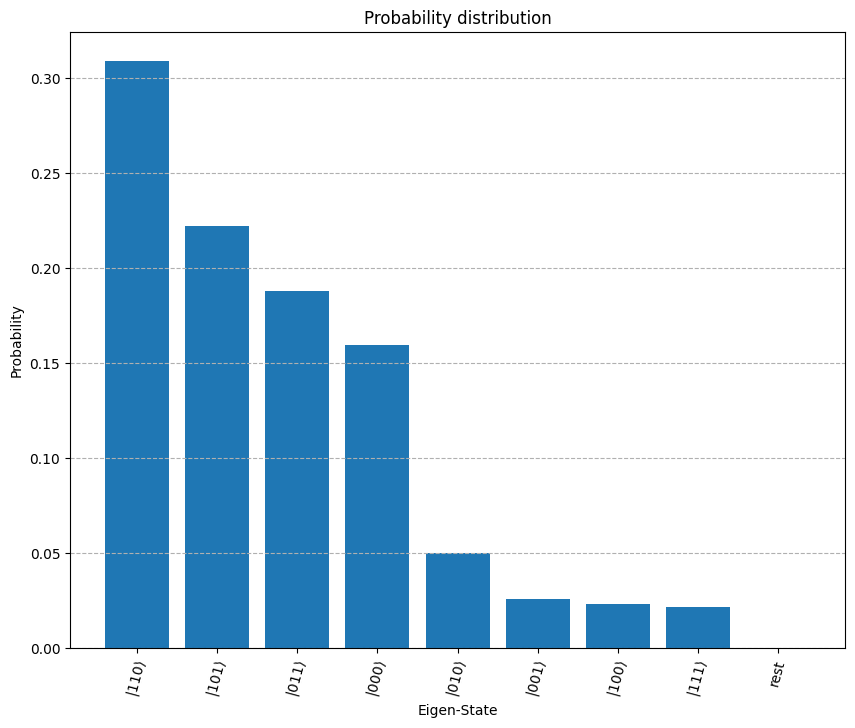

In [21]:
q_custom.result.plot_probabilities()

## RQAOA on a QVM

The RQAOA Workflow also works with Azure. (Note: RQAOA requires multiple loops of the QAOA algorithm, this algorithm can require many executions on the QPU. Thus, it will take a while!)

In [22]:
np_integer = NumberPartition([1,2,3,4,5,15])
np_qubo = np_integer.qubo

In [23]:
from openqaoa import RQAOA

q_rqaoa = QAOA()
q_rqaoa.set_device(device_azure_qvm)

r = RQAOA(qaoa=q_rqaoa, rqaoa_type='custom')

# Set parameters for RQAOA, in this case we fix the steps to 1 (default), the final cutoff value to 3
r.set_rqaoa_parameters(steps = 1, n_cutoff = 3)


In [24]:
r.compile(np_qubo)

In [25]:
r.optimize()

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


............

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


.......

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

initial_layout is not a known attribute of class <class 'azure.quantum._client.models._models_py3.JobDetails'> and will be ignored


........

In [26]:
r.result

{'solution': {'111010': 64.0, '000101': 64.0},
 'classical output': {'minimum energy': -38.0,
  'optimal states': ['110', '001']},
 'elimination rules': [{(3, 4): -1.0}, {(2, 4): -1.0}, {(1, 2): 1.0}],
 'schedule': [1, 1, 1],
 'total steps': 3}

And there you have it! You've just performed QAOA and RQAOA on Emulators hosted by Azure.
Azure Quantum also contains QPUs hosted by hardware providers like Rigetti and IonQ. 
We can't wait to see what you can do with OpenQAOA and this new backend!
If you find something that you'd like to have as a feature or a bug while using the Azure backend. 
Raise an issue and we will keep in touch!